># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
> ##  <font color="green">In Lab Task # 05</font>
> ###  <font color="black">Group # 01</font>

🧪 Lab Exercise: Logistic Regression in Finance; This lab uses a realistic, messy, synthetic financial dataset designed to simulate customer loan behavior and default risk.

* * *

*Dataset*: [Generated Finance Dataset](https://drive.google.com/file/d/1EV3S9CL2IBLT53N3EjKWxctLnu3L5Dgh/view?usp=drive_link)

* * *
📊 Dataset Columns

| Column              | Description                                                |
| :------------------ | :--------------------------------------------------------- |
| **CustomerID**      | Unique identifier for each customer                        |
| **CreditScore**     | Numeric credit score (300–850), may include noisy outliers |
| **AnnualIncome**    | Annual income in USD (contains noise and variation)        |
| **LoanAmount**      | Total loan amount requested or approved                    |
| **LoanTermMonths**  | Loan term duration in months (12, 24, 36, 48, 60)          |
| **NumLatePayments** | Number of historically late monthly payments               |
| **HasDefaulted**    | Binary target variable: 1 = defaulted, 0 = not defaulted   |


In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score

Q1. Load the dataset into a pandas DataFrame and display:

- The first 5 rows

- Shape of the dataset

- Summary statistics (df.describe())

In [14]:
df = pd.read_csv('finance_dataset.csv')
print("First 5 rows:")
display(df.head())
print("\nShape:", df.shape)
print("\nSummary statistics:")
df.describe()

First 5 rows:


,CustomerID,CreditScore,AnnualIncome,LoanAmount,LoanTermMonths,NumLatePayments,HasDefaulted
0,1,704,68892,21996,48,0,0
1,2,673,83641,19623,48,2,0
2,3,712,34021,15298,36,0,0
3,4,756,63444,11765,12,1,0
4,5,668,45240,18491,36,1,0



Shape: (500, 7)

Summary statistics:


,CustomerID,CreditScore,AnnualIncome,LoanAmount,LoanTermMonths,NumLatePayments,HasDefaulted
count,500.000000,500.000000,500.0000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,679.832000,55476.8940,15541.90600,36.312000,1.066000,0.166000
std,144.481833,49.059039,14669.9572,5051.21615,17.128498,0.981617,0.372453
min,1.000000,517.000000,14546.0000,518.00000,12.000000,0.000000,0.000000
25%,125.750000,644.750000,46070.5000,11987.50000,24.000000,0.000000,0.000000
50%,250.500000,680.000000,55427.5000,15598.50000,36.000000,1.000000,0.000000
75%,375.250000,711.250000,64768.5000,18773.00000,48.000000,2.000000,0.000000
max,500.000000,872.000000,94485.0000,28008.00000,60.000000,5.000000,1.000000


Q2. Create a boxplot for CreditScore, AnnualIncome, and LoanAmount.
Identify any outliers and comment on whether they seem realistic.

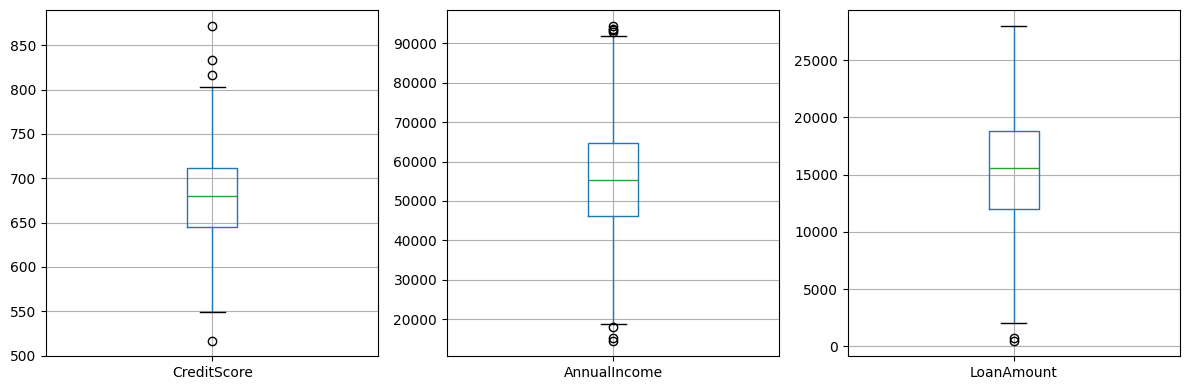

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
df.boxplot(column='CreditScore', ax=axes[0])
df.boxplot(column='AnnualIncome', ax=axes[1])
df.boxplot(column='LoanAmount', ax=axes[2])
plt.tight_layout()
plt.show()

Q3. Remove the column ***CustomerID***. Why should this coumn no be included in model training?

In [16]:
df = df.drop('CustomerID', axis=1)
df.head()

,CreditScore,AnnualIncome,LoanAmount,LoanTermMonths,NumLatePayments,HasDefaulted
0,704,68892,21996,48,0,0
1,673,83641,19623,48,2,0
2,712,34021,15298,36,0,0
3,756,63444,11765,12,1,0
4,668,45240,18491,36,1,0


Q4. Split the dataset into training and testing sets using an 80/20 ratio.

In [17]:
X = df.drop('HasDefaulted', axis=1)
y = df['HasDefaulted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 400
Test set size: 100


Q.5 Using the training data, generate a logistic regression classifier to predict the Labels of the  samples in the test data.

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions on test data:", y_pred)

Predictions on test data: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Q.6 Print the coefficients of the model. which features appear to increase the likelihood of defaulting?

In [19]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coef_df)
print("\nFeatures with positive coefficients increase likelihood of defaulting:")
print(coef_df[coef_df['Coefficient'] > 0]['Feature'].tolist())

           Feature  Coefficient
0      CreditScore    -0.003140
1     AnnualIncome     0.000002
2       LoanAmount     0.000032
3   LoanTermMonths     0.006281
4  NumLatePayments    -0.245378

Features with positive coefficients increase likelihood of defaulting:
['AnnualIncome', 'LoanAmount', 'LoanTermMonths']


Q7. compute the following:
- Accuracy
- Precision
- Recall
- F1-score

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.89
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\suydi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Q8. Why might ***precision*** be more important than accuracy in a finacial default prediction model?

In [21]:
print("""Precision is more important in financial default prediction because:
1. False positives can lead to denying loans to good customers
2. Dataset is likely imbalanced (fewer defaults), so accuracy is misleading
3. High precision ensures confidence in default predictions, reducing lending cost""" )

Precision is more important in financial default prediction because:
1. False positives can lead to denying loans to good customers
2. Dataset is likely imbalanced (fewer defaults), so accuracy is misleading
3. High precision ensures confidence in default predictions, reducing lending cost


Q9. Create a new feature

DebtToIncome = LoanAmount / AnnualIncome

Train teh model again and compare performance.

In [22]:
df['DebtToIncome'] = df['LoanAmount'] / df['AnnualIncome']

X_new = df.drop('HasDefaulted', axis=1)
y_new = df['HasDefaulted']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

model_new = LogisticRegression(max_iter=1000)
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

print("Performance with DebtToIncome feature:")
print("Accuracy:", accuracy_score(y_test_new, y_pred_new))
print("Precision:", precision_score(y_test_new, y_pred_new))
print("Recall:", recall_score(y_test_new, y_pred_new))
print("F1-score:", f1_score(y_test_new, y_pred_new))

Performance with DebtToIncome feature:
Accuracy: 0.89
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\suydi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
